# Preprocessing 
#### This file includes preprocessing steps and their plots for sleep stage classification.

Labels come from 2 different PSG systems: Remlogic and Somnomedics. Sleep stage labels are as follows:

0 = Awake = SLEEP-S0 \
1 = REM   = SLEEP-REM \
2 = Light = SLEEP-S1 and  SLEEP-S2 \
3 = Deep  = SLEEP-S3 

EMFIT is the piezoelectric mat and Somnofy is the radar.

## Imports and Loading

In [1]:
import pandas as pd
import numpy as np
from loader import *
import matplotlib.pyplot as plt
from constants import *
from plot import *
from helpers import *

In [2]:
subjectID = PARTICIPANT_IDS[5]
len(PARTICIPANT_IDS)

46

In [3]:
sleep_stages = read_patient_data(subjectID)

In [4]:
sleep_stages.head()

,sleep_stage_num_somnofy,sleep_stage_num_emfit,sleep_stage_num_psg
timestamp_local,,,
2021-09-15 21:48:30+00:00,2.0,1.0,2.0
2021-09-15 21:49:00+00:00,2.0,1.0,2.0
2021-09-15 21:49:30+00:00,2.0,1.0,2.0
2021-09-15 21:50:00+00:00,2.0,1.0,2.0
2021-09-15 21:50:30+00:00,2.0,1.0,2.0


<AxesSubplot:xlabel='timestamp_local'>

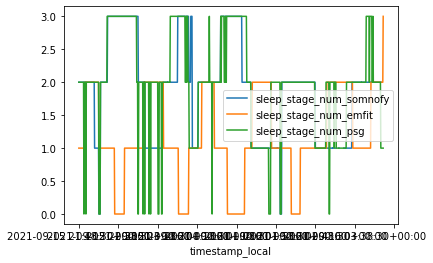

In [5]:
sleep_stages.plot()

In [6]:
sleep_stages.isna().sum()

sleep_stage_num_somnofy    31
sleep_stage_num_emfit       0
sleep_stage_num_psg         0
dtype: int64

Somnofy is missing where psg has the following values:
[[ 1.  2.  3.]
 [21.  8.  2.]]


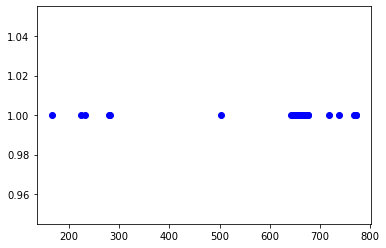

In [7]:
"""
1 -> missing values of radar
2 -> missing values of mat
3 -> missing values of psg
"""
plot_missing_sleepstages(sleep_stages)

## Imputing missing values
Comparison of three main techniques for time series data:
1. coping the previous or future value
2. having a rolling average and rounding it
3. Interpolation with "linear", "spline", "time", "quadratic"

In [8]:
df = pd.DataFrame()
df["somnofy"] = sleep_stages["sleep_stage_num_somnofy"]
df["truth"] = sleep_stages["sleep_stage_num_psg"]
df["Forward Fill"] = df["somnofy"].ffill()
df["Backward Fill"] = df["somnofy"].bfill()

<AxesSubplot:xlabel='timestamp_local'>

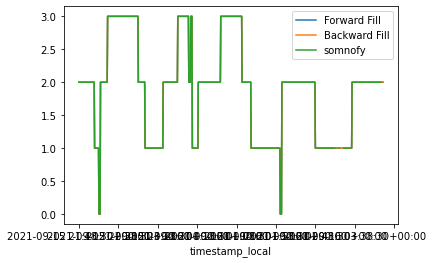

In [9]:
df[["Forward Fill", "Backward Fill", "somnofy"]].plot()

<AxesSubplot:xlabel='timestamp_local'>

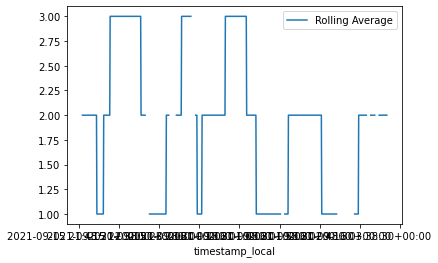

In [10]:
df["Rolling Average"] = df["somnofy"].rolling(window=10).mean().round()
df[["Rolling Average"]].plot()

<AxesSubplot:xlabel='timestamp_local'>

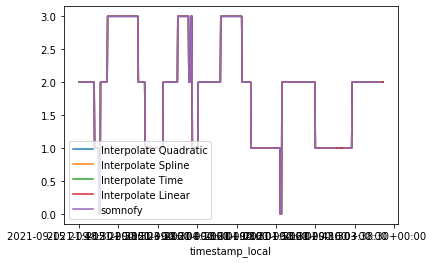

In [11]:
df["Interpolate Spline"]= df["somnofy"].interpolate(option='spline').round()
df["Interpolate Linear"]= df["somnofy"].interpolate(option='linear').round()
df["Interpolate Time"]= df["somnofy"].interpolate(option='time').round()
df["Interpolate Quadratic"]= df["somnofy"].interpolate(option='quadratic').round()
df[["Interpolate Quadratic", "Interpolate Spline", "Interpolate Time", "Interpolate Linear", "somnofy"]].plot()

In [12]:
# no difference between interpolation methods
diff = np.ones(3)
diff[0] = np.linalg.norm(df["somnofy"].interpolate(option='spline')-df["somnofy"].interpolate(option='linear'))
diff[1] = np.linalg.norm(df["somnofy"].interpolate(option='spline')-df["somnofy"].interpolate(option='time'))
diff[2] = np.linalg.norm(df["somnofy"].interpolate(option='spline')-df["somnofy"].interpolate(option='quadratic'))
diff

array([0., 0., 0.])

array([15.84297952, 15.84297952,         nan])

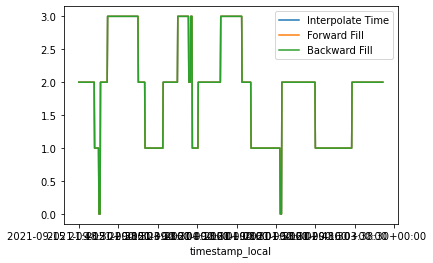

In [13]:
# decide which is best based on ground truth
df[["Interpolate Time", "Forward Fill", "Backward Fill"]].plot()
diff = np.ones(3)
diff[0] = np.linalg.norm(df["Interpolate Time"]-df["truth"].interpolate(option='time').round())
diff[1] = np.linalg.norm(df["Forward Fill"]-df["truth"].ffill())
diff[2] = np.linalg.norm(df["Backward Fill"]-df["truth"].ffill())
diff

In [14]:
test_imputing()

array([45.,  1.,  0.])

In [15]:
impute_all()

[[                           sleep_stage_num_somnofy  sleep_stage_num_emfit  \
  timestamp_local                                                             
  2021-08-18 20:27:00+00:00                      2.0                    1.0   
  2021-08-18 20:27:30+00:00                      2.0                    1.0   
  2021-08-18 20:28:00+00:00                      2.0                    1.0   
  2021-08-18 20:28:30+00:00                      2.0                    1.0   
  2021-08-18 20:29:00+00:00                      2.0                    1.0   
  ...                                            ...                    ...   
  2021-08-19 04:10:00+00:00                      2.0                    2.0   
  2021-08-19 04:10:30+00:00                      2.0                    2.0   
  2021-08-19 04:11:00+00:00                      2.0                    2.0   
  2021-08-19 04:11:30+00:00                      2.0                    2.0   
  2021-08-19 04:12:00+00:00                      2.0